<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [2]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [2]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


**Exploracion de Dataframes**

Analizamos los datos para bucar contenidos o formatos que difitulten su procesado y tratamiento :

-Formato del Dataframe con las variables dependientes y el de variable independiente

-Revision en busqueda de valores NA

In [4]:
X.shape

(398, 7)

In [5]:
y.shape

(398, 1)

En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

**Localizacion de valores NA**

En el analisis exploratorio , localizamos 6  valores NA en la dimension Horsepower.

In [6]:
# Verificar valores faltantes en el DataFrame
print(X.isnull().sum())  # Muestra el número de valores faltantes por columna

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [7]:
# Verificar valores únicos en la columna 'horsepower'
print(X['horsepower'].unique())

# Contar los valores faltantes en 'horsepower'
print(X['horsepower'].isnull().sum())

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84.  64.  74. 116.  82.]
6


**Resolucion incidencia valores NA**

Optamos por sustituir los valores NA por 0 (X pasa a ser X_sin_nan )en vez de eliminar dichas columnas por que provocarian una cambio en la dimensiones del Dataframe, esto favorecera las transformaciones posteriores al continuar manteniendo dimensiones (398,7) al igual que y .

In [9]:
# # sustituir valores en filas faltantes
import numpy as np
X_sin_nan = np.nan_to_num(X, nan=0.0)

In [11]:
# Verificar valores faltantes en el DataFrame
print(np.isnan(X_sin_nan).sum()) # Muestra el número de valores faltantes por columna

0


In [12]:
X_sin_nan.shape

(398, 7)

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

In [13]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[nombre_columna], y, color='red', alpha=0.6)
    plt.xlabel(nombre_columna)
    plt.ylabel("MPG (Millas por Galón)")
    plt.title(f"Relación entre {nombre_columna} y MPG")
    plt.grid(True)
    plt.show()

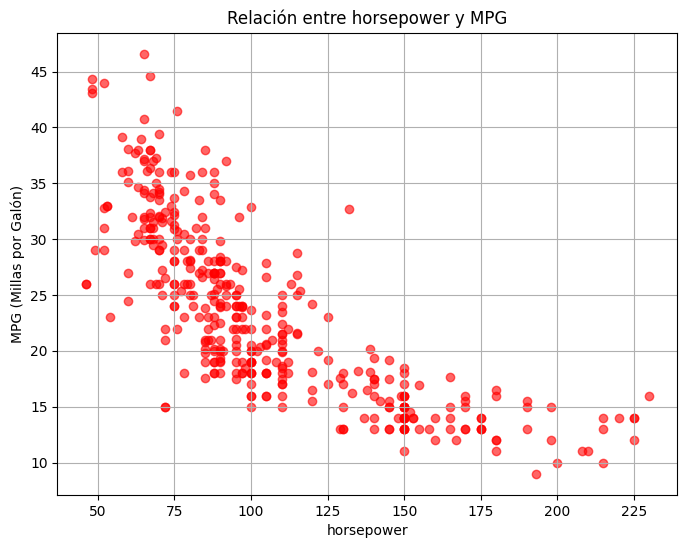

In [31]:
visualiza(X, y, 'horsepower')

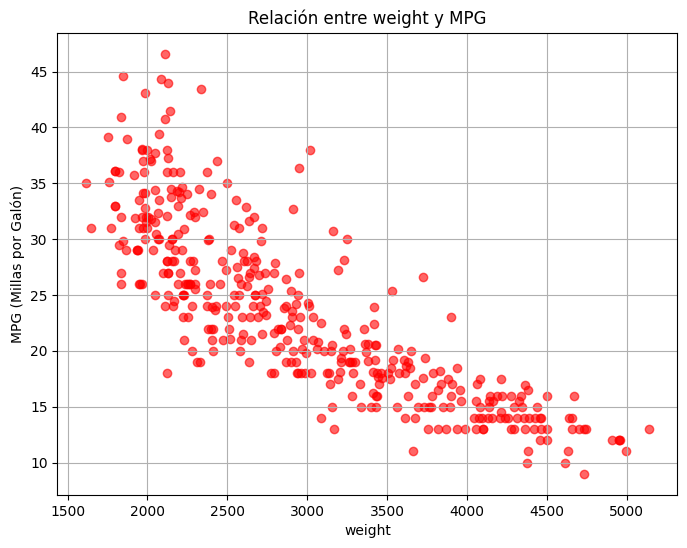

In [14]:
visualiza(X, y, 'weight')

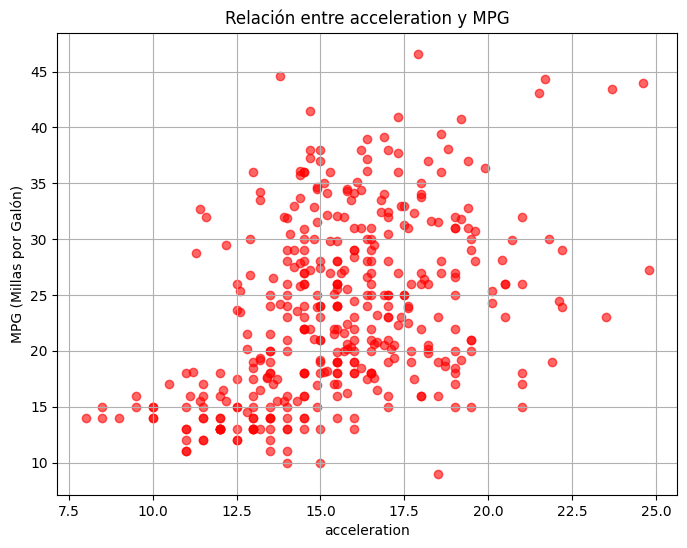

In [15]:
visualiza(X, y, 'acceleration')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

***Preparacion del dato&transformacion *** 

Iniciamos la preparacion del dato con el calculo del det del Df que contiene las variables dependientes.Este paso nos dara mas informacion sobre posibles correlaciones entre las variables 

In [16]:
#Analizamos el Det = 0 o no es cuadrada la matriz 
import numpy as np
np.linalg.det(X_sin_nan)

LinAlgError: Last 2 dimensions of the array must be square

El resultado del Det no es concluyente .Puede existir una importante correlacion entre lsa variables dependientes o bien el propio formato del DF al no ser cuadrado puede provocar el resultado obtenido.En este punto se plantean dos vias para continuar con la resolucion de la practica :

***Aplicacion de PCA***

Comento esta via de resolucion como principal.

***Empleo de Pseudoinversa en el caluclo de pesos y W***

En paralelo a la via PCA , realizo el desarrollo de la practica aplicando la pseudoinversa.Empleo ''' ''' para dejar el codigo en formato comentario


In [113]:
''' 
#Probamos ha hacer cuadrada la matriz y ver si Det ≠ 0
import numpy as np
matriz_cuadrada = np.dot(X_sin_nan.T, X_sin_nan) 

# Calcular el determinante , el determinante es diferente de 0 !!!
determinante = np.linalg.det(matriz_cuadrada)
print(f"Determinante de la matriz : {determinante}")
'''


Determinante de la matriz : 930645728537385.8


In [17]:

# VIA PRINCIPAL REDUCCION EMPLEANDO PCA
#APLICACION DE PCA PARA REDUCCION DE DIMENSIONES

import numpy as np
# Realizacion una estandarización de los datos puesto que el rango de valores es muy amplio
X_mean = np.mean(X_sin_nan, axis=0)
X_std = np.std(X_sin_nan, axis=0)
X_estandarizado = (X_sin_nan - X_mean) / X_std

# Calculamos la Matriz de covarianza
cov_matrix = np.cov(X_estandarizado.T)

# Cálculamos los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Calculamos la varianza explicada
explained_variance = eigenvalues / np.sum(eigenvalues)
explained_variance_cumulative = np.cumsum(explained_variance)

print("Varianza explicada acumulada:", explained_variance_cumulative)

#Conservamos componentes que expliquen al menos el 70% de la varianza busco con ello poder tener las dimensiones reducidas correctas para el calculo de W(shape 398,2)
n_components = np.argmax(explained_variance_cumulative >= 0.70) + 1

#Seleccionamos los autovectores correspondientes
reduced_eigenvectors = eigenvectors[:, :n_components]
X_reduced = np.dot(X_estandarizado, reduced_eigenvectors)


print("Dimensiones de los datos originales:", X_sin_nan.shape)
print("Dimensiones de los datos reducidos:", X_reduced.shape)


Varianza explicada acumulada: [0.65195938 0.78717049 0.89438745 0.96365136 0.96854565 0.98921101
 1.        ]
Dimensiones de los datos originales: (398, 7)
Dimensiones de los datos reducidos: (398, 2)


In [18]:
# VIA PRINCIPAL REDUCCION EMPLEANDO PCA
#Calculamos el determinante de la matriz reducida  ≠ 0
X_PCA = np.dot(X_reduced.T, X_reduced) 

determinante = np.linalg.det(X_PCA)
print(f"Determinante de la matriz reducida: {determinante}")

Determinante de la matriz reducida: 684218.9880196855


In [114]:
''' 
#Seguimos la via secundaría de pseudoinversa 
# 1. Estandarización de los datos
X_mean = np.mean(X_sin_nan, axis=0)
X_std = np.std(X_sin_nan, axis=0)
X_sin_nan = (X_sin_nan - X_mean) / X_std
'''

In [19]:
#Revisamos el formato de la matriz x
X_reduced.shape

(398, 2)

In [20]:
#Preparamos la matrix matriz_cuadrada añadiendole la columna de 1s
columna_1 = np.ones((X_reduced.shape[0], 1))
matriz_cuadrada_1 = np.hstack((columna_1, X_reduced))
print(matriz_cuadrada_1)


[[ 1.          2.67326255 -0.93226124]
 [ 1.          3.3878615  -1.0748229 ]
 [ 1.          3.00958804 -1.1969228 ]
 ...
 [ 1.         -0.88990557  0.43273599]
 [ 1.         -1.59989298  1.75450733]
 [ 1.         -1.61024395  1.90540358]]


In [21]:
#Revisamos el formato de la matriz x con 1s
matriz_cuadrada_1.shape

(398, 3)

In [22]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [23]:
#Realizamos la traspuesta para el calculo de W
#Traspuesta
X_Unos_T = matriz_cuadrada_1.T
print(X_Unos_T.shape)

(3, 398)


In [24]:
#Inversa
#inv = np.linalg.inv(np.dot(X_Unos_T, matriz_cuadrada_1))
#Pseudoinversa 
X_pinv = np.linalg.pinv(matriz_cuadrada_1)
print(X_pinv.shape)

(3, 398)


In [25]:
#Revisamos el formato de la matriz y 
print(y.shape)

(398, 1)


In [26]:
#Calculamos W
W = X_pinv @ y
print(W)

         mpg
0  23.514573
1  -3.099869
2   0.270194


In [27]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    

    # TODO 3 Calcula los pesos

    return w

In [28]:
# Array de prueba!!
X_New = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_New = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])


In [29]:
#Hacemos los calculos necesarios para los nuevos datos
import numpy as np

# 1. Transponer X para que tenga (10, 2)
X_New_T = X_New.T

# 2. Agregar columna de unos para el término independiente
unos = np.ones((X_New_T.shape[0], 1))  # Columna de unos
X_New_OK = np.hstack((unos, X_New_T))  # Agregar columna de unos


# Imprimir resultados
print(X_New_OK)


[[1.000e+00 1.710e+03 2.003e+03]
 [1.000e+00 1.262e+03 1.976e+03]
 [1.000e+00 1.786e+03 2.001e+03]
 [1.000e+00 1.717e+03 1.915e+03]
 [1.000e+00 2.198e+03 2.000e+03]
 [1.000e+00 1.362e+03 1.993e+03]
 [1.000e+00 1.694e+03 2.004e+03]
 [1.000e+00 2.090e+03 1.973e+03]
 [1.000e+00 1.774e+03 1.931e+03]
 [1.000e+00 1.077e+03 1.939e+03]]


In [30]:
# 4. Calcular las predicciones
Y_pred_new = np.dot(X_New_OK, W)

print(Y_pred_new)

[[-4736.06164555]
 [-3354.6157696 ]
 [-4972.19204545]
 [-4781.53781763]
 [-6249.6080912 ]
 [-3660.00932489]
 [-4686.19355417]
 [-5922.11752963]
 [-4953.90721857]
 [-2791.13727029]]


Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [31]:
#CONVERTIMOS LOS DT ORIGINALES A NUMPY
X_np = X.to_numpy()  # X: DataFrame (398, 7)
y_np = y.to_numpy()  # y: DataFrame (398, 1)

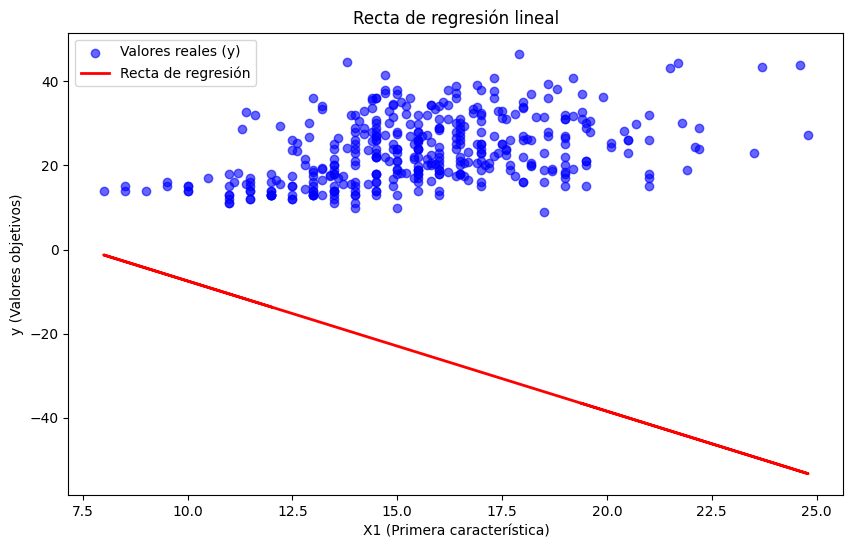

In [32]:
#Si lo que queremos es solo generar el modelo para predecir esta bien con PCA , si lo que queremos es representar los valores originales de X con PCA no es correcto hemos perdido datos
# import matplotlib.pyplot as plt
import numpy as np

W = np.array(W)

# Extraer los pesos del modelo
W0 = W[0]  # Intercepto
W1 = W[1]  # Peso de la primera característica
W2 = W[2]  # Peso de la segunda característica

# Seleccionar la característica que usarás para graficar (por ejemplo, X1)
X1 = X_sin_nan[:, 4]   # Primera característica (columna 0 de X_reduced)

# Calcular las predicciones (y_hat) usando la ecuación de la regresión lineal
y_hat = W0 + W1 * X1  # Predicciones en función de X1 (en 2D)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X1, y, color="blue", label="Valores reales (y)", alpha=0.6)  # Puntos reales
plt.plot(X1, y_hat, color="red", label="Recta de regresión", linewidth=2)  # Recta ajustada
plt.xlabel("X1 (Primera característica)")
plt.ylabel("y (Valores objetivos)")
plt.title("Recta de regresión lineal")
plt.legend()
plt.show()

In [33]:
# Acceso a los valores de W
intercepto = W[0]  # Punto de corte (intercepto)
pendiente_X1 = W[1]  # Pendiente de la primera característica (X1)
pendiente_X2 = W[2]  # Pendiente de la segunda característica (X2)

# Imprimir los valores
print("Intercepto:", intercepto)
print("Pendiente de X1:", pendiente_X1)
print("Pendiente de X2:", pendiente_X2)

Intercepto: [23.51457286]
Pendiente de X1: [-3.09986857]
Pendiente de X2: [0.27019423]


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [36]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight',]]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


In [37]:
from sklearn.metrics import r2_score, mean_squared_error

# Predicciones con sklearn
y_pred_sklearn = lr.predict(X_lr)

# Cálculo de métricas
r2 = r2_score(y_lr, y_pred_sklearn)
mse = mean_squared_error(y_lr, y_pred_sklearn)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.6917929800341573
MSE: 18.780939734628397


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

**CONCLUSIONES DEL ANALISIS Y COMPARATIVA CON SKLEARN**

El modelo W tras una reduccion de sus dimensiones, tras aplicar el metodo PCA redujimos de 7 a 2 dimensiones por lo que el modelo utiliza una combinacion de las caracterisricas originales. Esta transformacion afecta tanto a las pendientes como al propio intercepto de W.
Los resultado de interpecto y la pendiente de cada uno de los metodos nos ofrece estos resultados :
**W** Intercepto: [23.51457286]
Pendiente de X1: [-3.09986857]
Pendiente de X2: [0.27019423]
**Sklearn** Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]

Concluimos a partir de dichos resultados que aun siendo los coeficientes  el intercepto significativamente diferentes ambos Modelos empleados reflejan la relacion inversa entre las varibles ***Weight*** y ***MPG***

A modo de evaluacion del ajuste calculamos y comparamos las metricas de R2 y MSE :

**W**R^2 para el modelo W: 0.7207988817575018
MSE para el modelo W: 17.01343264710307

**Sklearn**R^2: 0.6917929800341573
MSE: 18.780939734628397

Concluimos que el modelo w tienen un mejor desempeño para explicar la relacion entre las variables MPG y Weight.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



Existen unas claras diferencias entre ambos metodos que favorecen su uso para unos casos u otros.De manera general podemos expresar que el Metodo de minimos cuadrados ofrece una solucion cerrada, mientras que en el descenso de gradiente podemos optimizar actuando sobre los parametros de eta(tasa de aprendizaje), X0(punto de incio),Max.iter(numero maximo de iteraciones hasta que pare),Diff.to.stop(umbral de cambio) y delta(tamaño del paso en el gradiente).

El dinamismo de su solucion hace recomendable el descenso de gradiente para los datasets grandes en los que hay un numero importante de observaciones y dimensionalidad, se puede optimizar los coeficientes y asi reducir el MSE.

En el caso del metodo de minimos cuadrados es una buena eleccion en los casos en que los datasets son pequeños/medianos para obtener datos precisos,su calculo es directo y rapido mediante una expresion reducida. 

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [38]:

  import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Inicializamos variables
    loss_iter = []
    w_iter = [w0]
    w = w0

    # Añadimos la columna de 1s a X para el término de sesgo
    X1_DG = np.hstack([np.ones((X.shape[0], 1)), X])  

    # Iteraciones
    for i in range(n_iter):
     
        y_pred = np.dot(X1_DG, w)
        error = y_pred - y
        loss = (1 / (2 * X1_DG.shape[0])) * np.sum(error**2)
        loss_iter.append(loss)
        
        # Calculamos el gradiente
        gradient = (1 / X1_DG.shape[0]) * np.dot(X1_DG.T, error)
        
        # Actualizamos los pesos usando el descenso de gradiente
        w = w - eta * gradient
        w_iter.append(w.copy()) 
    
    return np.array(w_iter), np.array(loss_iter)



eta = 0.01 
n_iter = 2000 

# Pesos iniciales
np.random.seed(123)
w0 = np.random.rand(2, 1) 


y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5, 1))
X = np.array([
    [0.37020659],
    [-0.48234664],
    [0.51483616],
    [0.38352774],
    [1.29888065]
])


weights, loss = gradient_descent(X, y, w0, n_iter, eta)


print("Pesos finales:")
print(weights[-1])


print("Última pérdida:")
print(loss[-1])

Pesos finales:
[[183695.36963666]
 [ 40682.97678324]]
Última pérdida:
445188874.98982453


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [39]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


In [40]:
print(X_np.shape)  # Verificar la forma de X (debe ser (398, 1))
print(y_np.shape)  # Verificar la forma de y (debe ser (398, 1))

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [41]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

import numpy as np
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate


# TODO 2 Aplicamos el algoritmo


# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
